In [1]:
%matplotlib inline

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME
from vnpy.trader.app.ctaStrategy.strategy.strategyAtrRsi import AtrRsiStrategy
from vnpy.trader.app.ctaStrategy.strategy.strategyMultiTimeframe import MultiTimeframeStrategy

In [2]:
# 创建回测引擎对象
engine = BacktestingEngine()

In [9]:
# 设置回测使用的数据
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(MINUTE_DB_NAME, 'IF0000')  # 设置使用的历史数据库
engine.setStartDate('20100101')               # 设置回测用的数据起始日期

In [10]:
# 配置回测引擎参数
engine.setSlippage(0.2)     # 设置滑点为股指1跳
engine.setRate(0.3/10000)   # 设置手续费万0.3
engine.setSize(300)         # 设置股指合约大小 
engine.setPriceTick(0.2)    # 设置股指最小价格变动   
engine.setCapital(1000000)  # 设置回测本金

In [30]:
# 在引擎中创建策略对象
d = {'atrLength': 10}                     # 策略参数配置
#engine.initStrategy(AtrRsiStrategy, d)    # 创建策略对象
engine.initStrategy(MultiTimeframeStrategy, d)    # 创建策略对象

In [31]:
# 运行回测
engine.runBacktesting()          # 运行回测

2018-02-10 14:32:08.718000	开始载入数据
2018-02-10 14:32:08.740000	载入完成，数据量：12852
2018-02-10 14:32:08.740000	开始回测
2018-02-10 14:32:08.740000	策略初始化完成
2018-02-10 14:32:08.740000	策略启动完成
2018-02-10 14:32:08.740000	开始回放数据
2018-02-10 14:32:09.696000	数据回放结束
2018-02-10 14:32:09.696000	用时：0.956000s


2018-02-10 14:12:37.756000	计算按日统计结果
2018-02-10 14:12:37.769000	------------------------------
2018-02-10 14:12:37.769000	首个交易日：	2010-04-16
2018-02-10 14:12:37.769000	最后交易日：	2010-06-28
2018-02-10 14:12:37.769000	总交易日：	48
2018-02-10 14:12:37.769000	盈利交易日	14
2018-02-10 14:12:37.769000	亏损交易日：	23
2018-02-10 14:12:37.769000	起始资金：	1000000
2018-02-10 14:12:37.769000	结束资金：	1,018,003.13
2018-02-10 14:12:37.769000	总收益率：	1.8
2018-02-10 14:12:37.769000	总盈亏：	18,003.13
2018-02-10 14:12:37.769000	最大回撤: 	-62,167.7
2018-02-10 14:12:37.769000	总手续费：	1,856.87
2018-02-10 14:12:37.769000	总滑点：	4,320.0
2018-02-10 14:12:37.769000	总成交金额：	61,895,700.0
2018-02-10 14:12:37.769000	总成交笔数：	72.0
2018-02-10 14:12:37.769000	日均盈亏：	375.07
2018-02-10 14:12:37.769000	日均手续费：	38.68
2018-02-10 14:12:37.769000	日均滑点：	90.0
2018-02-10 14:12:37.769000	日均成交金额：	1,289,493.75
2018-02-10 14:12:37.769000	日均成交笔数：	1.5
2018-02-10 14:12:37.769000	日均收益率：	0.04%
2018-02-10 14:12:37.769000	收益标准差：	0.95%
2018-02-10 14:12:37.769000	Sharpe Ratio：	0.6

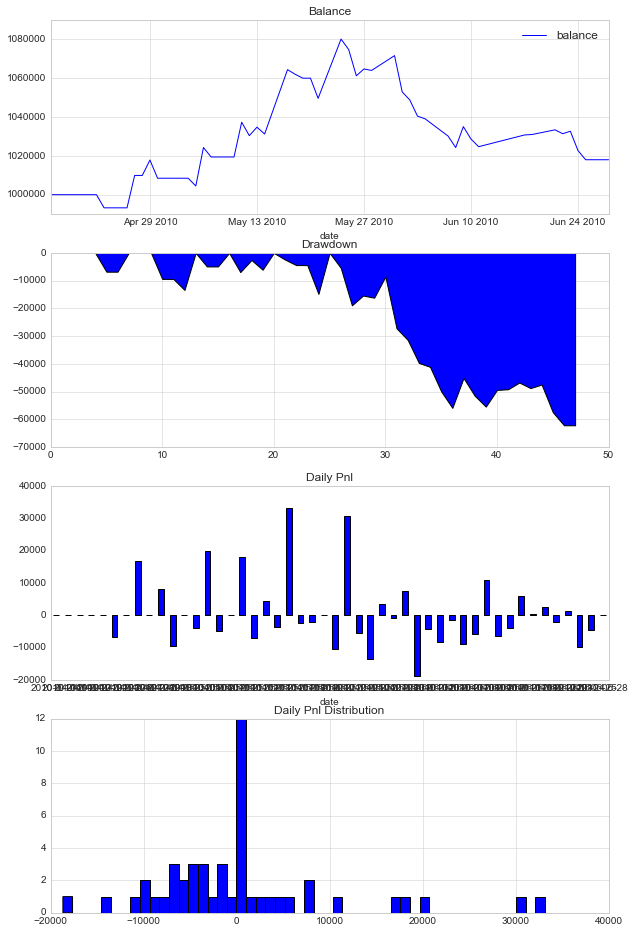

In [13]:
# 显示逐日回测结果
engine.showDailyResult()

In [28]:
df = engine.calculateDailyResult()
df, d = engine.calculateDailyStatistics(df)
print d

2018-02-10 14:31:16.483000	计算按日统计结果
{'startDate': datetime.date(2010, 4, 16), 'totalDays': 48, 'endBalance': 1439708.1610000031, 'endDate': datetime.date(2010, 6, 28), 'dailyTurnover': 11605443.75, 'dailyNetPnl': 9160.586687500063, 'dailyTradeCount': 7.5, 'totalReturn': 43.970816100000306, 'returnStd': 6.7117387327106215, 'totalTradeCount': 360L, 'dailyReturn': 0.7592508897420136, 'dailySlippage': 810.0, 'lossDays': 20, 'profitDays': 17, 'dailyCommission': 348.1633125, 'maxDrawdown': -487912.63559999783, 'totalTurnover': 557061300.0, 'totalSlippage': 38880.0, 'totalNetPnl': 439708.161000003, 'sharpeRatio': 1.7524913699233922, 'totalCommission': 16711.839}


In [ ]:
# 显示逐笔回测结果
engine.showBacktestingResult()

In [ ]:
# 显示前10条成交记录
for i in range(10):
    d = engine.tradeDict[str(i+1)].__dict__
    print 'TradeID: %s, Time: %s, Direction: %s, Price: %s, Volume: %s' %(d['tradeID'], d['dt'], d['direction'], d['price'], d['volume'])

In [29]:
# 优化配置
setting = OptimizationSetting()                 # 新建一个优化任务设置对象
setting.setOptimizeTarget('sharpeRatio')            # 设置优化排序的目标是策略净盈利
setting.addParameter('atrLength', 10, 10, 1)    # 增加第一个优化参数atrLength，起始12，结束20，步进2
#setting.addParameter('atrMa', 20, 30, 5)        # 增加第二个优化参数atrMa，起始20，结束30，步进5
#setting.addParameter('rsiLength', 5)            # 增加一个固定数值的参数

# 执行多进程优化
import time
start = time.time()
engine.runParallelOptimization(AtrRsiStrategy, setting)
print u'耗时：%s' %(time.time()-start)

2018-02-10 14:31:48.779000	------------------------------
2018-02-10 14:31:48.780000	优化结果：
2018-02-10 14:31:48.780000	{'atrLength': 10}: 1.09796645833
耗时：4.5640001297
